This is a project showcasing the use of histogram specification for image analysis

In [1]:
import numpy as np
import cv2  
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms

In [2]:
img_dark = cv2.imread("/Users/E1012131/Downloads/dark contrast photo.webp") # Load dark contrast image
img_ref = cv2.imread("/Users/E1012131/Downloads/high contrast reference image.jpg") # Load reference image to match histogram with dark image

print('Dark Image Shape:', img_dark.shape)
print('Reference Image Shape:', img_ref.shape)
print('Dark Image Channel number:' + str(img_dark.ndim))
print('Reference Image Channel number:' + str(img_ref.ndim))

Dark Image Shape: (973, 1500, 3)
Reference Image Shape: (789, 564, 3)
Dark Image Channel number:3
Reference Image Channel number:3


In [3]:
image = img_dark
# convert image to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
reference = img_ref

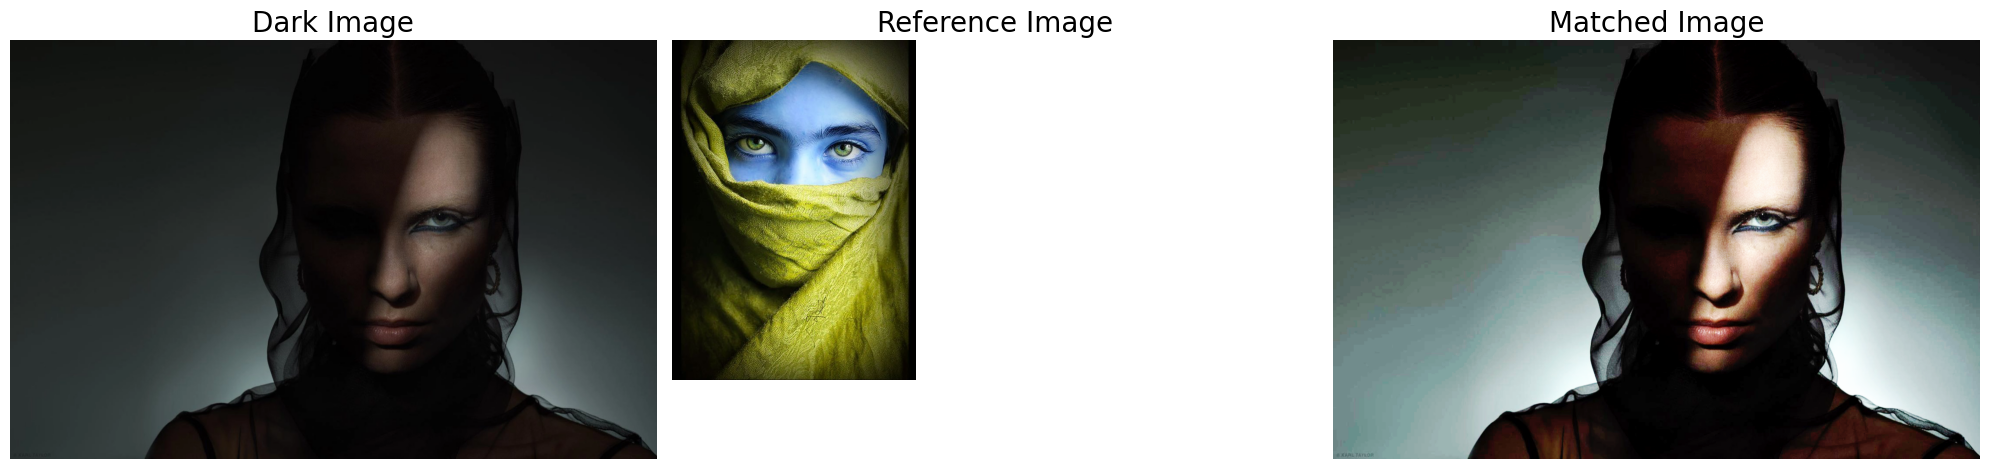

In [4]:
matched = match_histograms(image, reference )
matched = matched.astype(np.uint8)

# for plotting the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10), sharex=True, sharey=True)

for aa in (ax1, ax2, ax3):
    aa.set_axis_off()
    
ax1.imshow(image)
ax1.set_title('Dark Image', fontsize=20)
ax2.imshow(reference)
ax2.set_title('Reference Image', fontsize=20)
ax3.imshow(matched)
ax3.set_title('Matched Image', fontsize=20)

plt.tight_layout() 
plt.show()

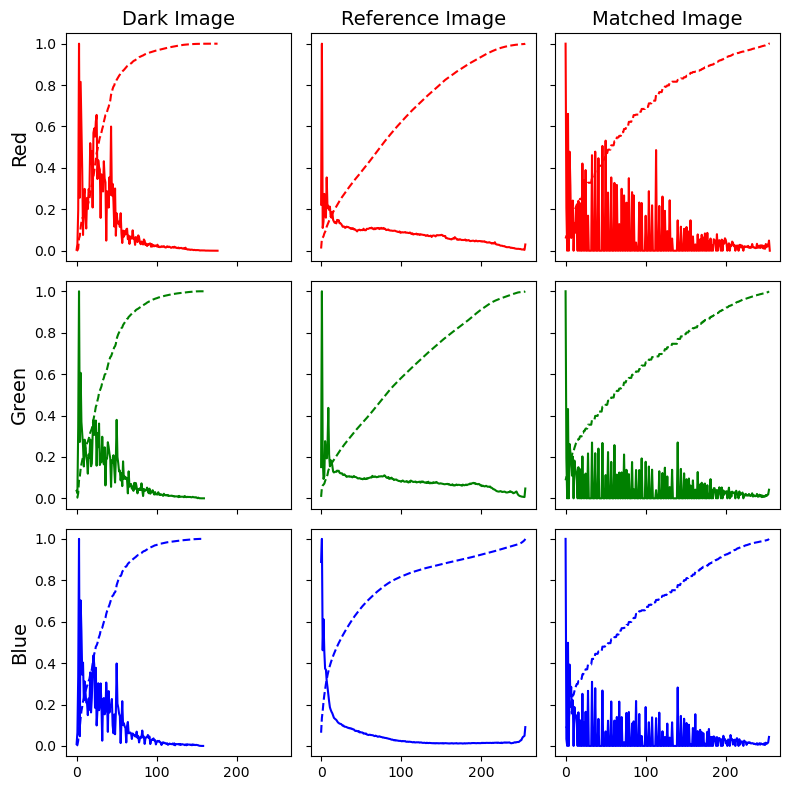

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8), sharex=True, sharey=True)

for i, img in enumerate((image, reference, matched)):
    for j, col in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[:, :, j], nbins=256)
        axes[j, i].plot(bins, img_hist / img_hist.max(), color=col)
        img_cdf, bins = exposure.cumulative_distribution(img[:, :, j], nbins=256)
        axes[j, i].plot(bins, img_cdf, color=col, linestyle='--')
        axes[j, 0].set_ylabel(['Red', 'Green', 'Blue'][j], fontsize=14)
        
axes[0, 0].set_title('Dark Image', fontsize=14)
axes[0, 1].set_title('Reference Image', fontsize=14)
axes[0, 2].set_title('Matched Image', fontsize=14) 

plt.tight_layout()
plt.show()